In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mysql-connector-python

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/5f/c3/b4c36fbc65c119fca83f258557573d8cd296da5e198d3752c669f8e871e2/mysql_connector_python-9.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta 

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'E:/dataset/ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database='ecommerce'
)
cur = db.cursor()

In [12]:
# list all the unique cities where customers are located
query = """select distinct customer_city from customers"""

cur.execute(query)
data= cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [13]:
# Count the number of orders placed in 2017.
query = """select count(order_id) from orders where year(order_purchase_timestamp)=2017 """

cur.execute(query)
data= cur.fetchall()
'Total Orders in Year 2017 are :',data[0][0]

('Total Orders in Year 2017 are :', 45101)

In [14]:
# Find the total sales per category.
query = """select upper(products.product_category) as category, round(sum(payments.payment_value),2) as sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns=['category','sales'])
df

,category,sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


In [15]:
#  Calculate the percentage of orders that were paid in installments.

query = """select sum(case when payment_installments >=1 then 1 else 0 end)/count(*)*100
from payments
"""

cur.execute(query)
data= cur.fetchall()
data

[(Decimal('99.9981'),)]

,state_name,Customer_count
0,SP,41746
4,RJ,12852
2,MG,11635
5,RS,5466
3,PR,5045
1,SC,3637
9,BA,3380
13,DF,2140
8,ES,2033
7,GO,2020


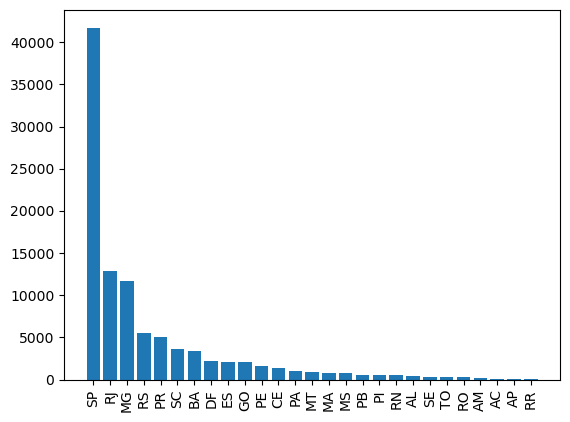

In [16]:
# Count the number of customers from each state. 
query = """SELECT customer_state, COUNT(customer_id)
FROM customers 
GROUP BY customer_state"""
cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns=["state_name","Customer_count"])
df = df.sort_values(by ="Customer_count", ascending = False)
plt.bar(df["state_name"],df["Customer_count"])
plt.xticks(rotation = 90)
plt.show
df

<function matplotlib.pyplot.show(close=None, block=None)>

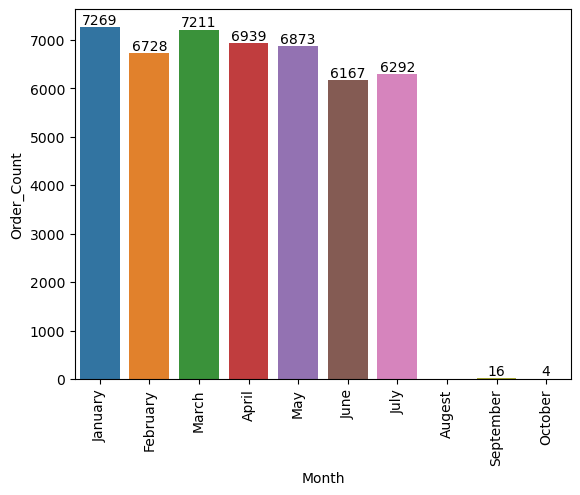

In [17]:
# Calculate the number of orders per month in 2018.
query = """select monthname(order_purchase_timestamp) as Month,count(order_id) as Order_Count from orders where year(order_purchase_timestamp)=2018
group by month"""

cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns = ["Month","Order_Count"])
o = ["January","February","March","April",'May',"June","July","Augest","September","October"]
ax = sns.barplot(x= df["Month"],y=df['Order_Count'], data = df , order= o)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.show


In [18]:
# Find the average number of products per order, grouped by customer city.
query = """with count_per_Order as (select orders.order_id, orders.customer_id, count(order_items.order_id) as OC
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city , round(avg(count_per_Order.OC),2)
from customers join count_per_Order
on customers.customer_id = count_per_Order.customer_id
group by customers.customer_city
"""

cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns = ["Customer City", "Average Order"])
df.head(10)

,Customer City,Average Order
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
5,rio de janeiro,1.15
6,mario campos,1.33
7,guariba,1.00
8,cuiaba,1.20
9,franca,1.25


In [19]:
# Calculate the percentage of total revenue contributed by each product category.
query = """select upper(products.product_category) as category, round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) as sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales desc
"""

cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns=['category','sales'])
df

,category,sales
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


In [37]:
#  Identify the correlation between product price and the number of times a product has been purchased.
import numpy as np
query = """SELECT 
    products.product_category, 
    COUNT(order_items.product_id) AS product_count, 
    ROUND(AVG(order_items.price), 2) AS average_price
FROM 
    products 
JOIN 
    order_items
ON 
    products.product_id = order_items.product_id
GROUP BY 
    products.product_category;

"""
cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns=['category','Order_count', 'price'])
arr1 = df["Order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation between product price and the number of times a product has been purchased is ", a[0][1])

the correlation between product price and the number of times a product has been purchased is  -0.10631514167157562


<function matplotlib.pyplot.show(close=None, block=None)>

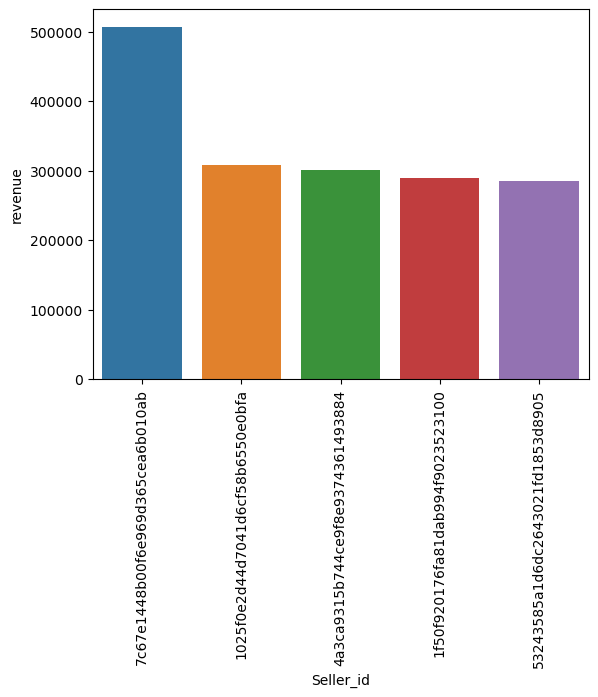

In [42]:
# Calculate the total revenue generated by each seller, and rank them by revenue.
query = """select *, dense_rank() over(ORDER BY revenue desc) as rn from
(SELECT order_items.seller_id,
sum(payments.payment_value) as revenue
FROM order_items
JOIN payments
ON order_items.order_id = payments.order_id
GROUP BY  order_items.seller_id) as subquery
"""
cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns=['Seller_id','revenue', 'rank'])
df= df.head()
sns.barplot(x='Seller_id', y = 'revenue', data = df )
plt.xticks(rotation = 90)
plt.show

In [5]:
# Calculate the moving average of order values for each customer over their order history.
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id,
orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a
"""
cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns=['Customer_id','Time', 'Payment','Moving_Avg'])
df.head()
# sns.barplot(x='Seller_id', y = 'revenue', data = df )
# plt.xticks(rotation = 90)
# plt.show

,Customer_id,Time,Payment,Moving_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


In [7]:
# Calculate the cumulative sales per month for each year.
query = """select years, months, payment ,sum(payment)
over(order by years, months) as cumulative_Sales from
(select year(orders.order_purchase_timestamp) as years , month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns=['years','months', 'payment','cumulative_Sales'])
df

,years,months,payment,cumulative_Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


In [8]:
# Calculate the year-over-year growth rate of total sales.

query = """with a as (select year(orders.order_purchase_timestamp) as years ,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id = payments.order_id
group by years	 order by years)
select years,((payment-lag(payment,1) over(order by years))/ lag(payment,1) over(order by years))*100  from a
"""
cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns=['years', 'yoy % growth'])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


<function matplotlib.pyplot.show(close=None, block=None)>

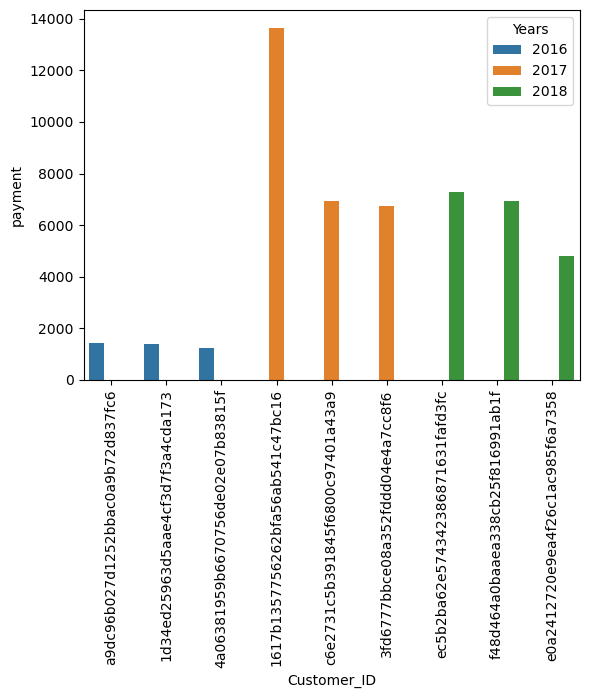

In [12]:
# Identify the top 3 customers who spent the most money in each year.

query = """ 
select years , customer_id, payment, d_rank from 
(select year(orders.order_purchase_timestamp) as years, orders.customer_id, sum(payments.payment_value) as payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) as d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp), orders.customer_id) as a
where d_rank<=3
"""
cur.execute(query)
data= cur.fetchall()
df = pd.DataFrame(data, columns=['Years', 'Customer_ID','payment','D_rank'])
df
sns.barplot(x='Customer_ID', y='payment', data = df , hue = 'Years')
plt.xticks(rotation = 90)
plt.show